<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 124.8 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 149.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 171.4 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.9-cp312-cp312-linux_x86_64.whl size=303802 sha256=b717aa999e3533d7971c575066d4a05f8bff8f5a2191732abec1bdaf975c13a7
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/43/ef/2d/2c51d496bf084945ffdf838b4cc8767b8ba1cc20eb41588831
Successfully built peewee
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 128.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [7]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
import plotly.io as pio
pio.renderers.default = "iframe"

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [11]:
tesla = yf.Ticker("TSLA")
tesla

yfinance.Ticker object <TSLA>

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [12]:
# Extract stock information for the maximum available period  
tesla_data = tesla.history(period="max")  

# Display the first few rows of the DataFrame  
print(tesla_data.head())  

# Optionally, save the data to a CSV file for future use  
tesla_data.to_csv("tesla_stock_data.csv")  

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [13]:
# Reset the index of the DataFrame  
tesla_data.reset_index(inplace=True)  

# Display the first five rows of the DataFrame  
print(tesla_data.head())  

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [14]:

import requests  

# URL of the webpage to download  
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"  

# Send a GET request to the URL  
response = requests.get(url)  

# Save the text of the response as a variable  
html_data = response.text  

# Print the first 500 characters of the HTML data to verify  
print(html_data[:500])  


<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
    <head>
        <meta charset="utf-8">
        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">
		<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />
	


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [15]:
import requests  
from bs4 import BeautifulSoup  

# URL of the webpage to download  
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"  

# Send a GET request to the URL  
response = requests.get(url)  

# Save the text of the response as a variable  
html_data = response.text  

# Parse the HTML data using BeautifulSoup and the 'html.parser' parser  
soup = BeautifulSoup(html_data, 'html.parser')  

# Print the parsed HTML content (prettified version)  
print(soup.prettify()[:500])  # Print the first 500 characters to verify  

<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
  <title>
   Te


Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [16]:
import requests  
from bs4 import BeautifulSoup  
import pandas as pd  

# URL of the webpage to download  
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"  

# Send a GET request to the URL  
response = requests.get(url)  

# Save the text of the response as a variable  
html_data = response.text  

# Parse the HTML data using BeautifulSoup  
soup = BeautifulSoup(html_data, 'html.parser')  

# Find the table containing Tesla Revenue  
table = soup.find('table')  # Assuming the first table contains the Tesla Revenue  

# Extract the table rows  
rows = table.find_all('tr')  

# Extract the data into a list of dictionaries  
data = []  
for row in rows[1:]:  # Skip the header row  
    cols = row.find_all('td')  
    date = cols[0].text.strip()  
    revenue = cols[1].text.strip()  
    data.append({"Date": date, "Revenue": revenue})  

# Convert the list of dictionaries into a DataFrame  
tesla_revenue = pd.DataFrame(data)  

# Display the first few rows of the DataFrame  
print(tesla_revenue.head())  

   Date  Revenue
0  2021  $53,823
1  2020  $31,536
2  2019  $24,578
3  2018  $21,461
4  2017  $11,759


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [17]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

Execute the following lines to remove an null or empty strings in the Revenue column.


In [18]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [19]:
print(tesla_revenue.tail()) 

    Date Revenue
8   2013  $2,013
9   2012    $413
10  2011    $204
11  2010    $117
12  2009    $112


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [22]:
gme = yf.Ticker("GME")
print(gme.info)

{'address1': '625 Westport Parkway', 'city': 'Grapevine', 'state': 'TX', 'zip': '76051', 'country': 'United States', 'phone': '817 424 2000', 'website': 'https://www.gamestop.com', 'industry': 'Specialty Retail', 'industryKey': 'specialty-retail', 'industryDisp': 'Specialty Retail', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'GameStop Corp., a specialty retailer, provides games and entertainment products through its stores and ecommerce platforms in the United States, Canada, Australia, and Europe. The company sells new and pre-owned gaming platforms; accessories, such as controllers, gaming headsets, and virtual reality products; new and pre-owned gaming software; and in-game digital currency, digital downloadable content, and full-game downloads. It sells collectibles comprising apparel, toys, trading cards, gadgets, and other retail products for pop culture and technology enthusiasts, as well as engages 

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [23]:
import yfinance as yf  

# Create a ticker object for GameStop  
gamestop = yf.Ticker("GME")  

# Extract historical stock data with the maximum available period  
gme_data = gamestop.history(period="max")  

# Display the first few rows of the DataFrame to verify  
print(gme_data.head()) 

                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603296  1.662209   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [24]:
import yfinance as yf  

# Step 1: Create a ticker object for GameStop  
gamestop = yf.Ticker("GME")  

# Step 2: Extract historical stock data with the maximum available period  
gme_data = gamestop.history(period="max")  

# Step 3: Reset the index of the DataFrame  
gme_data.reset_index(inplace=True)  

# Step 4: Display the first five rows of the DataFrame  
print(gme_data.head())  

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666417  1.666417  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615920  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [25]:
import requests  

# URL of the webpage to download  
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"  

# Send a GET request to the URL  
response = requests.get(url)  

# Save the text of the response as a variable  
html_data_2 = response.text  

# Display the first 500 characters of the HTML data to verify  
print(html_data_2[:500]) 

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class=" js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface g


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [26]:
from bs4 import BeautifulSoup  

# Parse the HTML data using BeautifulSoup and the html.parser  
soup = BeautifulSoup(html_data_2, "html.parser")  

# Display the parsed HTML content (optional, for verification)  
print(soup.prettify()[:500])  # Display the first 500 characters of the parsed HTML 

<!DOCTYPE html>
<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface ge


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [32]:
!pip install lxml
import pandas as pd  
from bs4 import BeautifulSoup  

# Parse the HTML data using BeautifulSoup  
soup = BeautifulSoup(html_data_2, "html.parser")  

# Find the table containing GameStop Revenue  
table = soup.find("table")  # Assuming there's only one table in the HTML  

# Use pandas to read the table into a DataFrame  
gme_revenue = pd.read_html(str(table))[0]  # Convert the table to a DataFrame  

# Rename the columns to "Date" and "Revenue"  
gme_revenue.columns = ["Date", "Revenue"]  

# Remove the dollar sign and commas from the Revenue column and convert to numeric  
gme_revenue["Revenue"] = gme_revenue["Revenue"].replace({"\$": "", ",": ""}, regex=True).astype(float)  

# Display the first few rows of the cleaned DataFrame  
print(gme_revenue.head())  

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 76.1 MB/s eta 0:00:00
   Date  Revenue
0  2020   6466.0
1  2019   8285.0
2  2018   8547.0
3  2017   7965.0
4  2016   9364.0


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [33]:
print(gme_revenue.tail())  

    Date  Revenue
11  2009   8806.0
12  2008   7094.0
13  2007   5319.0
14  2006   3092.0
15  2005   1843.0


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


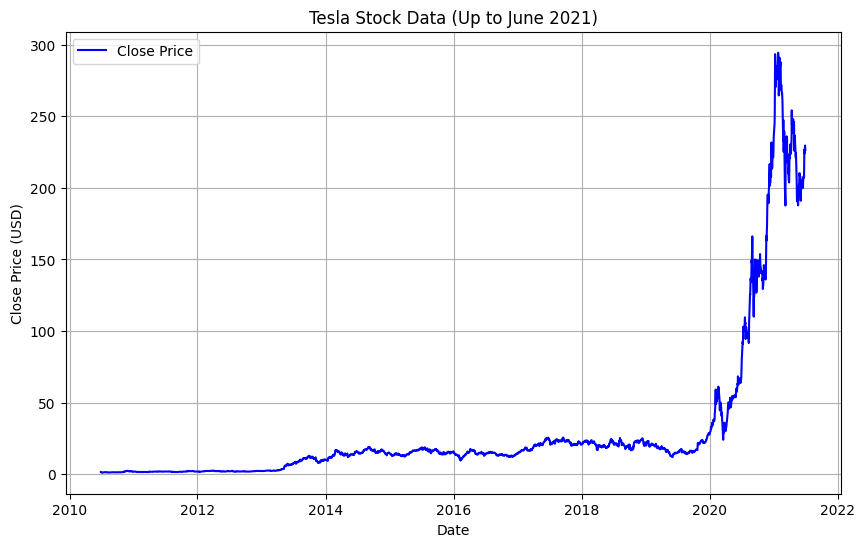

In [34]:
import yfinance as yf  
import matplotlib.pyplot as plt  

# Define the make_graph function  
def make_graph(data, title):  
    plt.figure(figsize=(10, 6))  
    plt.plot(data['Date'], data['Close'], label='Close Price', color='blue')  
    plt.title(title)  
    plt.xlabel('Date')  
    plt.ylabel('Close Price (USD)')  
    plt.legend()  
    plt.grid()  
    plt.show()  

# Download Tesla stock data  
tesla = yf.Ticker("TSLA")  
tesla_data = tesla.history(period="max")  

# Reset the index to make 'Date' a column  
tesla_data.reset_index(inplace=True)  

# Filter data up to June 2021  
tesla_data = tesla_data[tesla_data['Date'] <= '2021-06-30']  

# Use the make_graph function to plot the Tesla stock data  
make_graph(tesla_data, "Tesla Stock Data (Up to June 2021)")  

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


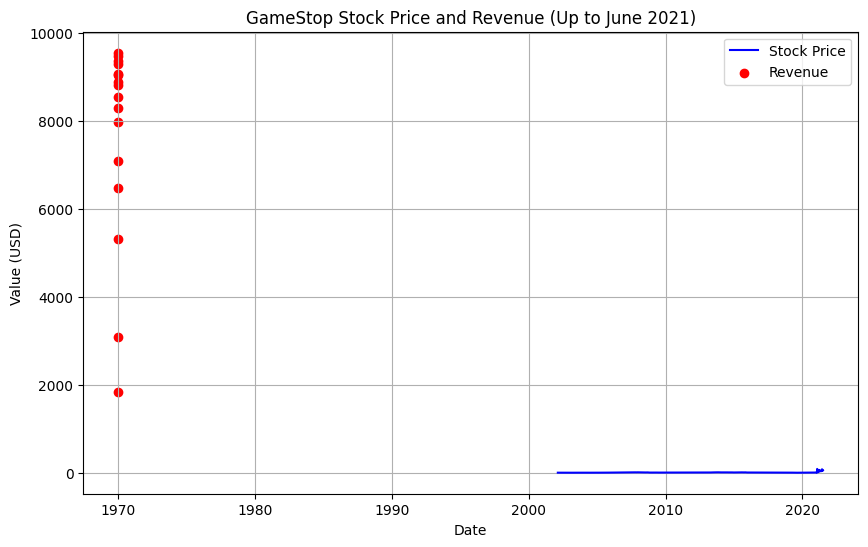

In [37]:
import yfinance as yf  
import matplotlib.pyplot as plt  
import pandas as pd  

# Define the make_graph function  
def make_graph(stock_data, revenue_data, title):  
    plt.figure(figsize=(10, 6))  
    
    # Plot stock data  
    plt.plot(stock_data['Date'], stock_data['Close'], label='Stock Price', color='blue')  
    
    # Plot revenue data  
    plt.scatter(revenue_data['Date'], revenue_data['Revenue'], label='Revenue', color='red')  
    
    # Add title and labels  
    plt.title(f"{title} Stock Price and Revenue (Up to June 2021)")  
    plt.xlabel('Date')  
    plt.ylabel('Value (USD)')  
    plt.legend()  
    plt.grid()  
    plt.show()  

# Download GameStop stock data  
gme = yf.Ticker("GME")  
gme_data = gme.history(period="max")  

# Reset the index to make 'Date' a column  
gme_data.reset_index(inplace=True)  

# Convert the 'Date' column to datetime format and remove timezone  
gme_data['Date'] = pd.to_datetime(gme_data['Date']).dt.tz_localize(None)  

# Filter stock data up to June 2021  
gme_data = gme_data[gme_data['Date'] <= pd.to_datetime('2021-06-30')]  

# Ensure gme_revenue is filtered up to June 2021  
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])  # Convert to datetime  
gme_revenue = gme_revenue[gme_revenue['Date'] <= pd.to_datetime('2021-06-30')]  

# Call the make_graph function  
make_graph(gme_data, gme_revenue, 'GameStop')  

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
